In [1]:
!pip install ipython-autotime
%load_ext autotime

time: 449 µs (started: 2021-04-27 19:32:35 +09:00)


In [2]:
!pip install kaggle --upgrade


     |████████████████████████████████| 58 kB 7.8 MB/s  eta 0:00:01
     |████████████████████████████████| 78 kB 10.1 MB/s eta 0:00:01
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73053 sha256=3102430b17c4797a01e1a6a8a6958ac02e32e54d17d4ef28e6a410fa2b7e6ec1
  Stored in directory: /Users/aman.jain/Library/Caches/pip/wheels/77/47/e4/44a4ba1b7dfd53faaa35f59f1175e123b213ff401a8a56876b
  Created wheel for python-slugify: filename=python_slugify-4.0.1-py2.py3-none-any.whl size=6767 sha256=81f07f95d9ee537d1ecfe0cf7bb412efe01b39f74c8b1faa47abea41b1d112c5
  Stored in directory: /Users/aman.jain/Library/Caches/pip/wheels/72/e6/db/122611605e60148f54ee2abaca98b2bbeafc6e22486a867bad
Successfully built kaggle python-slugify
time: 6.14 s (started: 2021-04-27 19:44:07 +09:00)


In [137]:
import pandas as pd 

train = pd.read_csv("./datasets/titanic/train.csv", index_col="PassengerId")
test = pd.read_csv("./datasets/titanic/test.csv", index_col="PassengerId")

time: 11.1 ms (started: 2021-04-28 01:37:56 +09:00)


In [12]:
train.shape

(891, 11)

time: 1.62 ms (started: 2021-04-27 23:39:55 +09:00)


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
time: 6.7 ms (started: 2021-04-27 23:39:56 +09:00)


In [14]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


time: 25 ms (started: 2021-04-27 23:39:58 +09:00)


In [15]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


time: 11.7 ms (started: 2021-04-27 23:40:06 +09:00)


### Missing data 

Age is 714/891

Embarked is 204/891

In [18]:
corr = train.corr()
corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


time: 9.45 ms (started: 2021-04-27 23:47:03 +09:00)


In [22]:
import matplotlib.pyplot as plt 
%matplotlib inline 

time: 1.59 ms (started: 2021-04-27 23:50:03 +09:00)


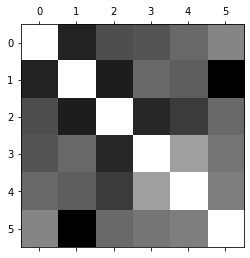

time: 99.2 ms (started: 2021-04-27 23:50:36 +09:00)


In [24]:
plt.matshow(corr, cmap=plt.cm.gray)

### It seems that `Parch` and `SibSp` are correlated.

In [26]:
corr["Parch"]["SibSp"]

0.41483769862015263

time: 3.02 ms (started: 2021-04-27 23:53:24 +09:00)


In [28]:
survived_val_counts = train["Survived"].value_counts()
survived_val_counts

0    549
1    342
Name: Survived, dtype: int64

time: 3.32 ms (started: 2021-04-27 23:59:51 +09:00)


In [37]:
survived_val_counts[:][1]

342

time: 2.11 ms (started: 2021-04-28 00:01:36 +09:00)


Text(0, 0.5, 'Passenger Count')

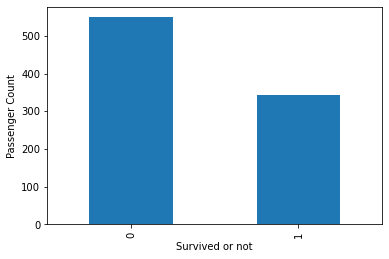

time: 111 ms (started: 2021-04-28 00:03:16 +09:00)


In [44]:
plt = train.Survived.value_counts().plot(kind='bar')
plt.set_xlabel('Survived or not')
plt.set_ylabel('Passenger Count')

### Check for class imbalance


In [50]:
train_columns = train.columns
train_columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

time: 1.99 ms (started: 2021-04-28 00:05:40 +09:00)


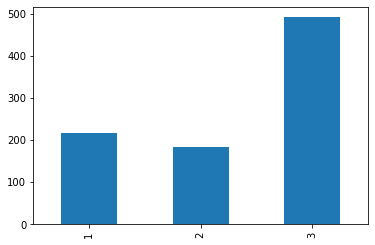

time: 94.7 ms (started: 2021-04-28 00:07:37 +09:00)


In [53]:
plt = train.Pclass.value_counts(sort=False).plot(kind="bar")

### Missing values per columns


In [55]:
for column in train_columns:
    print("{} -> {}".format(column, train[column].isnull().sum()))

Survived -> 0
Pclass -> 0
Name -> 0
Sex -> 0
Age -> 177
SibSp -> 0
Parch -> 0
Ticket -> 0
Fare -> 0
Cabin -> 687
Embarked -> 2
time: 4.66 ms (started: 2021-04-28 00:16:15 +09:00)


In [65]:
some_missing_data = train[train.isnull().any(axis=1)]
some_missing_data.head()



,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


time: 14.1 ms (started: 2021-04-28 00:50:16 +09:00)


In [71]:
train_age = train[["Age"]]
train_age

,Age
PassengerId,
1,22.0
2,38.0
3,26.0
4,35.0
5,35.0
...,...
887,27.0
888,19.0
889,NaN


time: 7.41 ms (started: 2021-04-28 00:54:38 +09:00)


In [82]:
from sklearn.impute import SimpleImputer

simple_imputer = SimpleImputer(strategy="median")

train_age = simple_imputer.fit_transform(train_age)

time: 5.82 ms (started: 2021-04-28 01:08:58 +09:00)


In [73]:
train = train.fillna({"Embarked": "S"})


time: 3.57 ms (started: 2021-04-28 01:04:53 +09:00)


In [78]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

time: 2.07 ms (started: 2021-04-28 01:07:15 +09:00)


In [79]:
train = train.drop("Name", axis=1)

time: 1.51 ms (started: 2021-04-28 01:07:30 +09:00)


In [84]:
train["Age"] = train_age

time: 625 µs (started: 2021-04-28 01:09:12 +09:00)


In [85]:
train.Age.isnull().sum()

0

time: 2.38 ms (started: 2021-04-28 01:09:12 +09:00)


In [86]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 116.6+ KB
time: 6.02 ms (started: 2021-04-28 01:09:24 +09:00)


In [87]:
#map each Sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,1,35.0,1,0,113803,53.1000,C123,S
5,0,3,0,35.0,0,0,373450,8.0500,NaN,S


time: 14.9 ms (started: 2021-04-28 01:09:37 +09:00)


In [88]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,1
2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,2
3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
4,1,1,1,35.0,1,0,113803,53.1000,C123,1
5,0,3,0,35.0,0,0,373450,8.0500,NaN,1


time: 13.2 ms (started: 2021-04-28 01:09:49 +09:00)


In [89]:
train = train.drop(['Cabin'], axis = 1)


time: 3.71 ms (started: 2021-04-28 01:10:29 +09:00)


In [92]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 109.6+ KB
time: 5.83 ms (started: 2021-04-28 01:10:40 +09:00)


In [104]:
train = train.drop(["Ticket"], axis=1)


time: 1.45 ms (started: 2021-04-28 01:25:35 +09:00)


In [105]:
X_train = train.drop(["Survived"], axis=1)
y_train = train["Survived"]

time: 1.61 ms (started: 2021-04-28 01:25:37 +09:00)


In [110]:
X_train.shape

(891, 7)

time: 1.76 ms (started: 2021-04-28 01:26:01 +09:00)


## Train a model


In [107]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

time: 585 µs (started: 2021-04-28 01:25:42 +09:00)


In [111]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]


time: 756 µs (started: 2021-04-28 01:26:09 +09:00)


In [112]:
from sklearn.model_selection import GridSearchCV

grid_search  = GridSearchCV(rf_clf, param_grid, cv=3, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] max_features=2, n_estimators=3 ..................................
[CV] ...... max_features=2, n_estimators=3, score=0.751, total=   0.0s
[CV] max_features=2, n_estimators=3 ..................................
[CV] ...... max_features=2, n_estimators=3, score=0.822, total=   0.0s
[CV] max_features=2, n_estimators=3 ..................................
[CV] ...... max_features=2, n_estimators=3, score=0.751, total=   0.0s
[CV] max_features=2, n_estimators=10 .................................
[CV] ..... max_features=2, n_estimators=10, score=0.771, total=   0.0s
[CV] max_features=2, n_estimators=10 .................................
[CV] ..... max_features=2, n_estimators=10, score=0.811, total=   0.0s
[CV] max_features=2, n_estimators=10 .................................
[CV] ..... max_features=2, n_estimators=10, score=0.795, total=   0.0s
[CV] max_features=2, n_estimators=30 .................................
[CV] ..... max_f

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..... max_features=2, n_estimators=30, score=0.798, total=   0.1s
[CV] max_features=4, n_estimators=3 ..................................
[CV] ...... max_features=4, n_estimators=3, score=0.758, total=   0.0s
[CV] max_features=4, n_estimators=3 ..................................
[CV] ...... max_features=4, n_estimators=3, score=0.805, total=   0.0s
[CV] max_features=4, n_estimators=3 ..................................
[CV] ...... max_features=4, n_estimators=3, score=0.798, total=   0.0s
[CV] max_features=4, n_estimators=10 .................................
[CV] ..... max_features=4, n_estimators=10, score=0.781, total=   0.0s
[CV] max_features=4, n_estimators=10 .................................
[CV] ..... max_features=4, n_estimators=10, score=0.815, total=   0.0s
[CV] max_features=4, n_estimators=10 .................................
[CV] ..... max_features=4, n_estimators=10, score=0.818, total=   0.0s
[CV] max_features=4, n_estimators=30 .................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.0s finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_features': [2, 4, 6],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             verbose=3)

time: 1.06 s (started: 2021-04-28 01:26:10 +09:00)


In [113]:
grid_search.best_estimator_

RandomForestClassifier(max_features=4, n_estimators=30, random_state=42)

time: 2.23 ms (started: 2021-04-28 01:26:23 +09:00)


In [114]:
grid_search.best_score_

0.8069584736251403

time: 1.91 ms (started: 2021-04-28 01:26:32 +09:00)



## Work on test data 


In [159]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB
time: 6.09 ms (started: 2021-04-28 01:44:26 +09:00)


In [160]:
test = test.drop(['Cabin'], axis = 1)

time: 1.61 ms (started: 2021-04-28 01:44:26 +09:00)


In [161]:
test = test.drop(["Ticket"], axis=1)


time: 1.54 ms (started: 2021-04-28 01:44:26 +09:00)


In [162]:
test['Embarked'] = test['Embarked'].map(embarked_mapping)


time: 1.85 ms (started: 2021-04-28 01:44:27 +09:00)


In [163]:
test = test.drop("Name", axis=1)

time: 2.08 ms (started: 2021-04-28 01:44:27 +09:00)


In [164]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 26.1+ KB
time: 5.06 ms (started: 2021-04-28 01:44:28 +09:00)


In [165]:
imputer = SimpleImputer(strategy="median")


time: 473 µs (started: 2021-04-28 01:44:28 +09:00)


In [166]:
test.Age = imputer.fit_transform(test[["Age"]])
test.Fare = imputer.fit_transform(test[["Fare"]])

time: 11.8 ms (started: 2021-04-28 01:44:30 +09:00)


In [167]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 26.1+ KB
time: 5.46 ms (started: 2021-04-28 01:44:30 +09:00)


In [168]:
test['Sex'] = test['Sex'].map(sex_mapping)

time: 1.75 ms (started: 2021-04-28 01:44:32 +09:00)


In [169]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 26.1 KB
time: 5.32 ms (started: 2021-04-28 01:44:33 +09:00)


In [170]:
predictions = grid_search.predict(test)
predictions

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

time: 11.4 ms (started: 2021-04-28 01:44:40 +09:00)


In [171]:
some_test_val = test.iloc[10]
some_test_val

Pclass       3.0000
Sex          0.0000
Age         27.0000
SibSp        0.0000
Parch        0.0000
Fare         7.8958
Embarked     1.0000
Name: 902, dtype: float64

time: 3.11 ms (started: 2021-04-28 01:44:40 +09:00)


In [172]:
grid_search.predict([some_test_val])

array([0])

time: 5.79 ms (started: 2021-04-28 01:44:42 +09:00)


In [180]:
test_df = pd.read_csv("./datasets/titanic/test.csv", index_col="PassengerId")
test_df["Survived"] = predictions

time: 5.97 ms (started: 2021-04-28 01:47:16 +09:00)


In [181]:
submission = test_df[["Survived"]]
submission.to_csv("submission.csv")

time: 4.32 ms (started: 2021-04-28 01:47:23 +09:00)
